In [2]:
import pandas as pd

In [3]:
with open('Crime_Data_from_2020_to_Present.csv', 'r') as file:
    for _ in range(10):
        print(file.readline())


DR_NO;Date Rptd;DATE OCC;TIME OCC;AREA;AREA NAME;Rpt Dist No;Part 1-2;Crm Cd;Crm Cd Desc;Mocodes;Vict Age;Vict Sex;Vict Descent;Premis Cd;Premis Desc;Weapon Used Cd;Weapon Desc;Status;Status Desc;Crm Cd 1;Crm Cd 2;Crm Cd 3;Crm Cd 4;LOCATION;Cross Street;LAT;LON

190326475;03/01/2020 12:00:00 AM;03/01/2020 12:00:00 AM;2130;7;Wilshire;784;1;510;VEHICLE - STOLEN;;0;M;O;101;STREET;;;AA;Adult Arrest;510;998;;;1900 S  LONGWOOD                     AV;;340375;-1183506

200106753;02/09/2020 12:00:00 AM;02/08/2020 12:00:00 AM;1800;1;Central;182;1;330;BURGLARY FROM VEHICLE;1822 1402 0344;47;M;O;128;BUS STOP/LAYOVER (ALSO QUERY 124);;;IC;Invest Cont;330;998;;;1000 S  FLOWER                       ST;;340444;-1182628

200320258;11/11/2020 12:00:00 AM;11/04/2020 12:00:00 AM;1700;3;Southwest;356;1;480;BIKE - STOLEN;0344 1251;19;X;X;502;MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC);;;IC;Invest Cont;480;;;;1400 W  37TH                         ST;;34021;-1183002

200907217;05/10/2023 12:00:00 AM;03/10/202

In [4]:
ds = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep=';')


In [5]:
print(ds.columns)
print(ds.head())


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central  

In [6]:
ds['Date Rptd'] = pd.to_datetime(ds['Date Rptd'])
ds['DATE OCC'] = pd.to_datetime(ds['DATE OCC'])

C:\Users\Camila\AppData\Local\Temp\ipykernel_21008\4215556658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Date Rptd'] = pd.to_datetime(ds['Date Rptd'])
C:\Users\Camila\AppData\Local\Temp\ipykernel_21008\4215556658.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['DATE OCC'] = pd.to_datetime(ds['DATE OCC'])


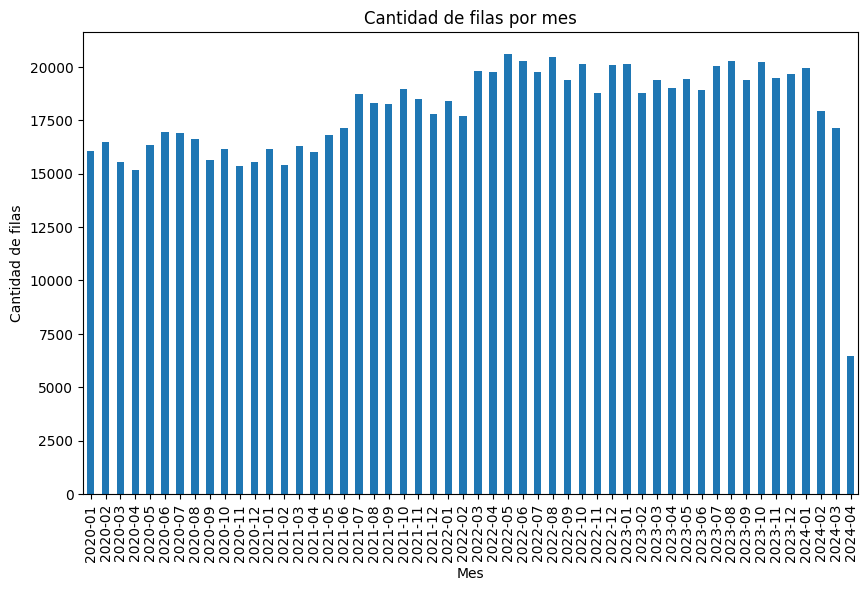

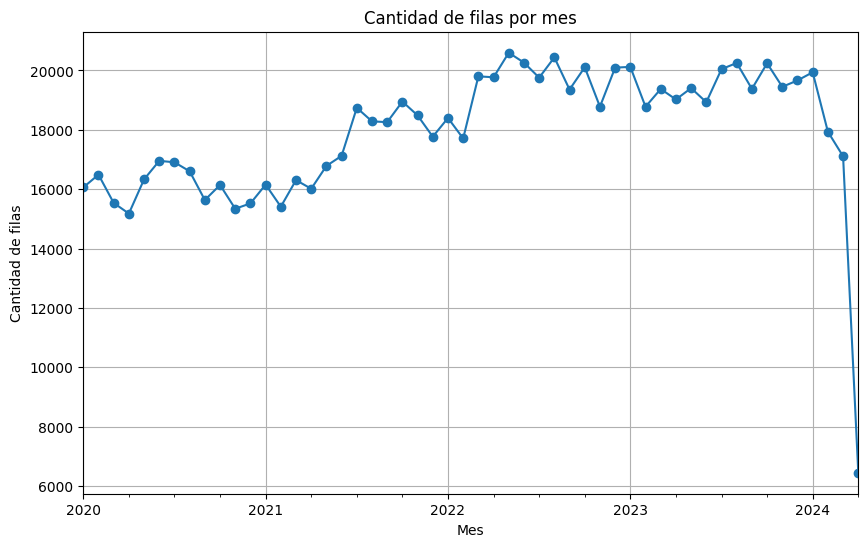

In [7]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df con una columna 'fecha'
# que contiene fechas en formato datetime

# Aquí estamos agrupando por mes y contando la cantidad de filas por mes
ds['Date Rptd'] = pd.to_datetime(ds['Date Rptd'])
ds['mes'] = ds['Date Rptd'].dt.to_period('M')
conteo_por_mes = ds.groupby('mes').size()

# Gráfico de barras
conteo_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de filas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de filas')
plt.show()

# Gráfico de líneas
conteo_por_mes.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Cantidad de filas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de filas')
plt.grid(True)
plt.show()

In [8]:
ds['AREA NAME'].value_counts(ascending=False)

AREA NAME
Central        63133
77th Street    58353
Pacific        54446
Southwest      52581
Hollywood      49080
Olympic        47069
Southeast      47068
N Hollywood    46993
Newton         46096
Wilshire       44753
Rampart        43617
West LA        42668
Northeast      39876
Van Nuys       39563
West Valley    39265
Harbor         38491
Devonshire     38309
Topanga        38232
Mission        37155
Hollenbeck     34493
Foothill       30899
Name: count, dtype: int64

In [9]:
ds['Crm Cd Desc'].value_counts(ascending=False)

Crm Cd Desc
VEHICLE - STOLEN                                      100225
BATTERY - SIMPLE ASSAULT                               73759
THEFT OF IDENTITY                                      57539
BURGLARY FROM VEHICLE                                  57538
BURGLARY                                               57015
                                                       ...  
FAILURE TO DISPERSE                                        6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
TRAIN WRECKING                                             1
Name: count, Length: 139, dtype: int64

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           932140 non-null  int64         
 1   Date Rptd       932140 non-null  datetime64[ns]
 2   DATE OCC        932140 non-null  datetime64[ns]
 3   TIME OCC        932140 non-null  int64         
 4   AREA            932140 non-null  int64         
 5   AREA NAME       932140 non-null  object        
 6   Rpt Dist No     932140 non-null  int64         
 7   Part 1-2        932140 non-null  int64         
 8   Crm Cd          932140 non-null  int64         
 9   Crm Cd Desc     932140 non-null  object        
 10  Mocodes         801530 non-null  object        
 11  Vict Age        932140 non-null  int64         
 12  Vict Sex        807934 non-null  object        
 13  Vict Descent    807924 non-null  object        
 14  Premis Cd       932130 non-null  flo

In [11]:
df = ds.drop(['Part 1-2', 'Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4', 'mes'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           932140 non-null  int64         
 1   Date Rptd       932140 non-null  datetime64[ns]
 2   DATE OCC        932140 non-null  datetime64[ns]
 3   TIME OCC        932140 non-null  int64         
 4   AREA            932140 non-null  int64         
 5   AREA NAME       932140 non-null  object        
 6   Rpt Dist No     932140 non-null  int64         
 7   Crm Cd          932140 non-null  int64         
 8   Crm Cd Desc     932140 non-null  object        
 9   Mocodes         801530 non-null  object        
 10  Vict Age        932140 non-null  int64         
 11  Vict Sex        807934 non-null  object        
 12  Vict Descent    807924 non-null  object        
 13  Premis Cd       932130 non-null  float64       
 14  Premis Desc     931578 non-null  obj

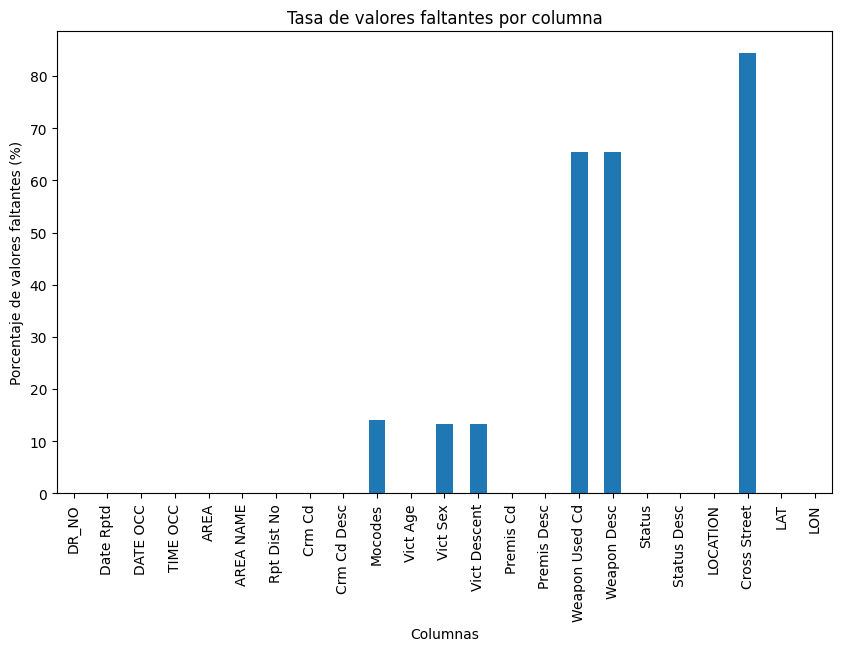

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           14.011844
Vict Age           0.000000
Vict Sex          13.324822
Vict Descent      13.325895
Premis Cd          0.001073
Premis Desc        0.060291
Weapon Used Cd    65.526745
Weapon Desc       65.526745
Status             0.000000
Status Desc        0.000000
LOCATION           0.000000
Cross Street      84.336902
LAT                0.000000
LON                0.000000
dtype: float64


In [13]:
# Calcular la tasa de valores faltantes
missing_data_percentage = df.isnull().mean() * 100

# Visualizar la tasa de valores faltantes
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind='bar')
plt.title('Tasa de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores faltantes (%)')
plt.show()

# Mostrar la tabla de porcentajes
print(missing_data_percentage)

In [14]:
# Calcular la distribución de datos por categorías clave
crime_type_distribution = df['Premis Desc'].value_counts(normalize=True) * 100

# Mostrar la tabla de distribución
print("\nDistribución de datos por tipo de crimen:")
print(crime_type_distribution)


Distribución de datos por tipo de crimen:
Premis Desc
STREET                                          25.401630
SINGLE FAMILY DWELLING                          16.858814
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    12.196080
PARKING LOT                                      6.905273
OTHER BUSINESS                                   4.769756
                                                  ...    
SEWAGE FACILITY/PIPE                             0.000215
HORSE RACING/SANTA ANITA PARK*                   0.000215
DEPT OF DEFENSE FACILITY                         0.000215
MTA - SILVER LINE - LAC/USC MEDICAL CENTER       0.000215
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*            0.000107
Name: proportion, Length: 306, dtype: float64


<Axes: xlabel='AREA NAME'>

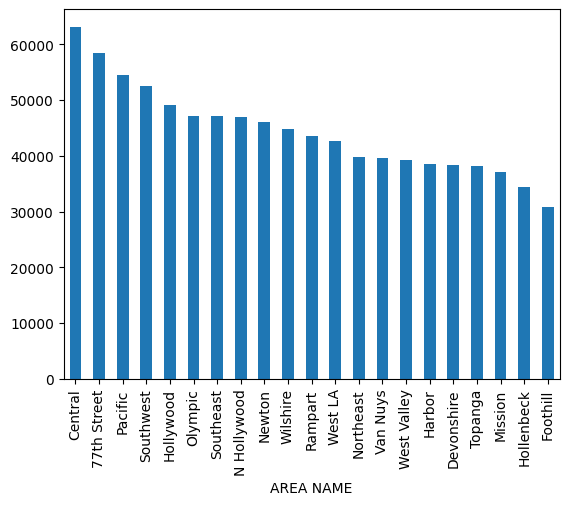

In [15]:
df['AREA NAME'].value_counts().plot(kind='bar')


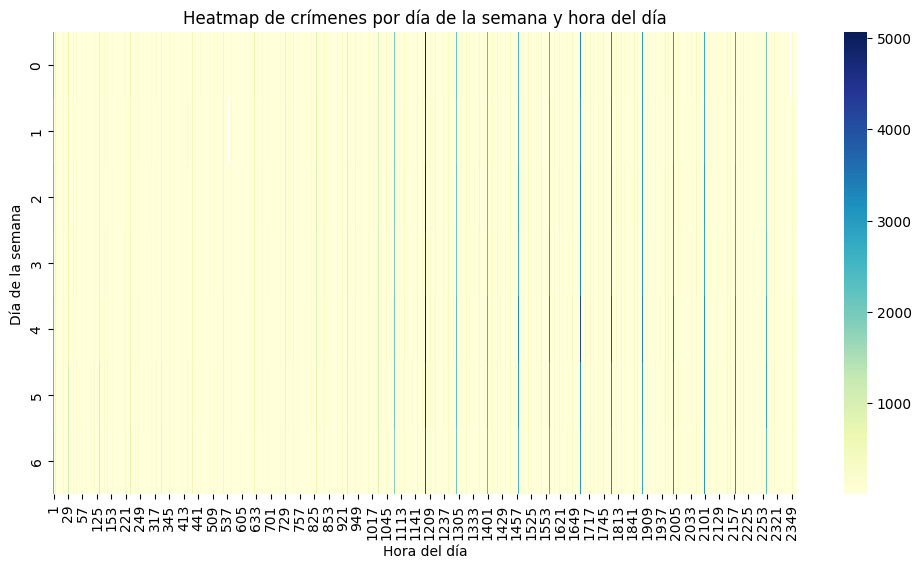

In [16]:
import seaborn as sns
# Crear tabla pivote para el heatmap
crime_heatmap = pd.pivot_table(df, values='DR_NO', index=df['DATE OCC'].dt.dayofweek, columns=df['TIME OCC'], aggfunc='count')

# Generar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_heatmap, cmap="YlGnBu")
plt.title('Heatmap de crímenes por día de la semana y hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.show()


Borramos las columnas que no considerábamos útiles.
Respecto a la columnas 'Victim Sex', 'Victim Descent' decidimos dejar los valores nulos como están porque no podriamos rellenarlos con información precisa. En caso que necesitemos consultar esas columnas de manera obligatoria para algun análisis específico, descartaremos dichas filas.
Respecto a la columna 'Weapon Used Cd' y 'Weapon Desc', entendemos que existen valores nulos debido a que no todos los crímenes incluyen armas.

In [17]:
df['Premis Desc']

0                                               STREET
1                    BUS STOP/LAYOVER (ALSO QUERY 124)
2         MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
3                                       CLOTHING STORE
4                                             SIDEWALK
                              ...                     
932135                          SINGLE FAMILY DWELLING
932136                                          STREET
932137                                        DRIVEWAY
932138                                        BUS STOP
932139                                           HOTEL
Name: Premis Desc, Length: 932140, dtype: object

In [18]:
df['Premis Desc'].value_counts(ascending=False)

Premis Desc
STREET                                          236636
SINGLE FAMILY DWELLING                          157053
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    113616
PARKING LOT                                      64328
OTHER BUSINESS                                   44434
                                                 ...  
SEWAGE FACILITY/PIPE                                 2
HORSE RACING/SANTA ANITA PARK*                       2
DEPT OF DEFENSE FACILITY                             2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: count, Length: 306, dtype: int64

In [19]:
df[df['Premis Desc'].isnull()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
3154,201300955,2020-09-01,2020-09-01,2030,13,Newton,1394,210,ROBBERY,2018 1822 0432 1100 0344 0329 1402 1309,...,418.0,NaN,103.0,RIFLE,IC,Invest Cont,6500 S MAIN ST,NaN,339802,-1182739
3822,201808344,2020-03-17,2020-03-17,2125,18,Southeast,1822,210,ROBBERY,1822 2018 0344 0213 0216 0334 0342,...,418.0,NaN,104.0,SHOTGUN,IC,Invest Cont,9300 S BROADWAY,NaN,339519,-1182781
3907,201513163,2020-07-27,2020-07-27,630,15,N Hollywood,1549,310,BURGLARY,1420 1309 0326 1414 2018 1607 1402,...,256.0,NaN,NaN,NaN,IC,Invest Cont,5500 CLEON AV,NaN,341705,-1183686
3999,201000898,2020-10-03,2020-10-03,345,10,West Valley,1018,310,BURGLARY,1202 0321 2018 1822 1609,...,418.0,NaN,NaN,NaN,IC,Invest Cont,7500 WOODLEY AV,NaN,342066,-1184837
7283,200110014,2020-04-03,2020-01-15,1640,1,Central,163,440,THEFT PLAIN - PETTY ($950 & UNDER),0907 0344 1822,...,418.0,NaN,NaN,NaN,AO,Adult Other,700 S BROADWAY,NaN,340452,-1182534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927621,240307329,2024-03-06,2024-03-06,10,3,Southwest,373,210,ROBBERY,0202 0344 2052 2050 0910 2034 1822 0444,...,972.0,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,3400 EXPOSITION BL,NaN,340222,-118333
928412,242106522,2024-03-04,2024-03-04,440,21,Topanga,2126,310,BURGLARY,1420 1402 0397,...,256.0,NaN,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,21300 DEERING CT,NaN,342156,-1185956
929776,241206634,2024-02-14,2024-02-14,725,12,77th Street,1232,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1266 1822 1402 0416 0400 0345,...,974.0,NaN,200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,SLAUSON AV,CRENSHAW BL,33989,-1183308
929884,241505109,2024-01-23,2024-01-23,330,15,N Hollywood,1549,310,BURGLARY,1822 0325 0329 2018,...,256.0,NaN,NaN,NaN,IC,Invest Cont,10800 CHANDLER BL,NaN,341687,-1183664


In [20]:
df[df['Premis Cd']== 418.0]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
3154,201300955,2020-09-01,2020-09-01,2030,13,Newton,1394,210,ROBBERY,2018 1822 0432 1100 0344 0329 1402 1309,...,418.0,NaN,103.0,RIFLE,IC,Invest Cont,6500 S MAIN ST,NaN,339802,-1182739
3822,201808344,2020-03-17,2020-03-17,2125,18,Southeast,1822,210,ROBBERY,1822 2018 0344 0213 0216 0334 0342,...,418.0,NaN,104.0,SHOTGUN,IC,Invest Cont,9300 S BROADWAY,NaN,339519,-1182781
3999,201000898,2020-10-03,2020-10-03,345,10,West Valley,1018,310,BURGLARY,1202 0321 2018 1822 1609,...,418.0,NaN,NaN,NaN,IC,Invest Cont,7500 WOODLEY AV,NaN,342066,-1184837
7283,200110014,2020-04-03,2020-01-15,1640,1,Central,163,440,THEFT PLAIN - PETTY ($950 & UNDER),0907 0344 1822,...,418.0,NaN,NaN,NaN,AO,Adult Other,700 S BROADWAY,NaN,340452,-1182534
8680,201300688,2020-04-25,2020-04-25,255,13,Newton,1303,310,BURGLARY,2018 1402 0907 2024 1607 0329 0358 0344,...,418.0,NaN,NaN,NaN,AA,Adult Arrest,1200 PALOMA ST,NaN,340312,-1182478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916535,241700601,2024-02-09,2024-02-09,200,17,Devonshire,1797,310,BURGLARY,2024 2004 1300 0344 1402,...,418.0,NaN,NaN,NaN,AA,Adult Arrest,16700 SCHOENBORN ST,NaN,342226,-118496
917896,240307284,2024-03-05,2024-03-05,236,3,Southwest,336,310,BURGLARY,1822 1309 0344 0329 1601 1602 1609 1402 1406,...,418.0,NaN,NaN,NaN,IC,Invest Cont,2700 S WESTERN AV,NaN,340282,-1183133
919430,241105306,2024-02-05,2024-02-05,220,11,Northeast,1145,310,BURGLARY,0321 1609,...,418.0,NaN,NaN,NaN,IC,Invest Cont,2300 FLETCHER DR,NaN,341045,-1182592
919755,241105338,2024-02-06,2024-02-05,40,11,Northeast,1109,310,BURGLARY,1609 2018,...,418.0,NaN,NaN,NaN,IC,Invest Cont,1700 COLORADO BL,NaN,341439,-1181955


In [21]:
#df['Premis Desc'].value_counts(ascending=False)
df[df['Premis Cd']== 256.0]['Premis Desc'].value_counts(ascending=False)

Series([], Name: count, dtype: int64)

Predicción: Predicción de tipo de crimen por área.
Predicción de tipo de crimen en base a la descripción del crimen.


El indice de precisión del modelo es algo bajo. En la proxima entrega se haran correcciones para mejorarlo

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Eliminar filas con NaN en y_sample
df.dropna(subset=['Premis Desc'], inplace=True)

# Ejemplo de toma de una muestra aleatoria del 20% antes de dividir
sample_data = df.sample(frac=0.2, random_state=42)

# Separar en X e y
X_sample = sample_data[['AREA', 'TIME OCC', 'LAT', 'LON']]
y_sample = sample_data['Premis Desc']

# Aplicar PCA para reducir dimensiones
pca = PCA(n_components=3)  # Elegir el número de componentes deseados
X_sample_pca = pca.fit_transform(X_sample)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample_pca, y_sample, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con menos estimadores
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)

C:\Users\Camila\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Camila\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Camila\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

Precisión del modelo: 0.27
Reporte de clasificación:
                                                                 precision    recall  f1-score   support

                       7TH AND METRO CENTER (NOT LINE SPECIFIC)       0.33      0.25      0.29        16
                             ABANDONED BUILDING ABANDONED HOUSE       0.00      0.00      0.00        42
                             ABORTION CLINIC/ABORTION FACILITY*       0.00      0.00      0.00         0
                                                       AIRCRAFT       0.00      0.00      0.00         1
                                                          ALLEY       0.06      0.03      0.04       266
                                                   AMTRAK TRAIN       0.00      0.00      0.00         2
                                                AMUSEMENT PARK*       0.00      0.00      0.00         1
                            APARTMENT/CONDO COMMON LAUNDRY ROOM       0.00      0.00      0.00        11
 

C:\Users\Camila\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Camila\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicción: Predicción de tipo de crimen por área.
Predicción de tipo de crimen en base a la descripción del crimen.
